In [ ]:
# Install necessary libraries
!pip install numpy pandas matplotlib seaborn scikit-learn


In [ ]:
# Install necessary libraries
!pip install numpy pandas matplotlib seaborn scikit-learn

# Import required libraries
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the dataset into a DataFrame
# Replace 'bank.csv' with the actual filename if different
filename = list(uploaded.keys())[0]  # Get the filename from the upload
data = pd.read_csv(filename)

# Display the first few rows of the dataset
data.head()


Saving bank.csv to bank.csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# One-hot encoding of categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Features and target variable
X = data_encoded.drop('deposit_yes', axis=1)  # Adjust target column name based on encoding
y = data_encoded['deposit_yes']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import time

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=200)
start_time = time.time()
log_reg.fit(X_train_scaled, y_train)
log_reg_time = time.time() - start_time
log_reg_acc = log_reg.score(X_test_scaled, y_test)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf.fit(X_train_scaled, y_train)
rf_time = time.time() - start_time
rf_acc = rf.score(X_test_scaled, y_test)

print(f"Logistic Regression - Accuracy: {log_reg_acc:.4f}, Training Time: {log_reg_time:.4f} seconds")
print(f"Random Forest - Accuracy: {rf_acc:.4f}, Training Time: {rf_time:.4f} seconds")


Logistic Regression - Accuracy: 0.8083, Training Time: 0.1975 seconds
Random Forest - Accuracy: 0.8406, Training Time: 4.4212 seconds


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA Reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# t-SNE Reduction
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

# Logistic Regression with PCA
log_reg_pca = LogisticRegression(max_iter=200)
start_time = time.time()
log_reg_pca.fit(X_train_pca, y_train)
log_reg_pca_time = time.time() - start_time
log_reg_pca_acc = log_reg_pca.score(X_test_pca, y_test)

# Random Forest with PCA
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf_pca.fit(X_train_pca, y_train)
rf_pca_time = time.time() - start_time
rf_pca_acc = rf_pca.score(X_test_pca, y_test)

# Logistic Regression with t-SNE
log_reg_tsne = LogisticRegression(max_iter=200)
start_time = time.time()
log_reg_tsne.fit(X_train_tsne, y_train)
log_reg_tsne_time = time.time() - start_time
log_reg_tsne_acc = log_reg_tsne.score(X_test_tsne, y_test)

# Random Forest with t-SNE
rf_tsne = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf_tsne.fit(X_train_tsne, y_train)
rf_tsne_time = time.time() - start_time
rf_tsne_acc = rf_tsne.score(X_test_tsne, y_test)

# Display Results After Dimensionality Reduction
print(f"Logistic Regression PCA - Accuracy: {log_reg_pca_acc:.4f}, Training Time: {log_reg_pca_time:.4f} seconds")
print(f"Random Forest PCA - Accuracy: {rf_pca_acc:.4f}, Training Time: {rf_pca_time:.4f} seconds")
print(f"Logistic Regression t-SNE - Accuracy: {log_reg_tsne_acc:.4f}, Training Time: {log_reg_tsne_time:.4f} seconds")
print(f"Random Forest t-SNE - Accuracy: {rf_tsne_acc:.4f}, Training Time: {rf_tsne_time:.4f} seconds")


Logistic Regression PCA - Accuracy: 0.6395, Training Time: 0.0158 seconds
Random Forest PCA - Accuracy: 0.6095, Training Time: 3.7420 seconds
Logistic Regression t-SNE - Accuracy: 0.6099, Training Time: 0.0322 seconds
Random Forest t-SNE - Accuracy: 0.4769, Training Time: 4.8939 seconds


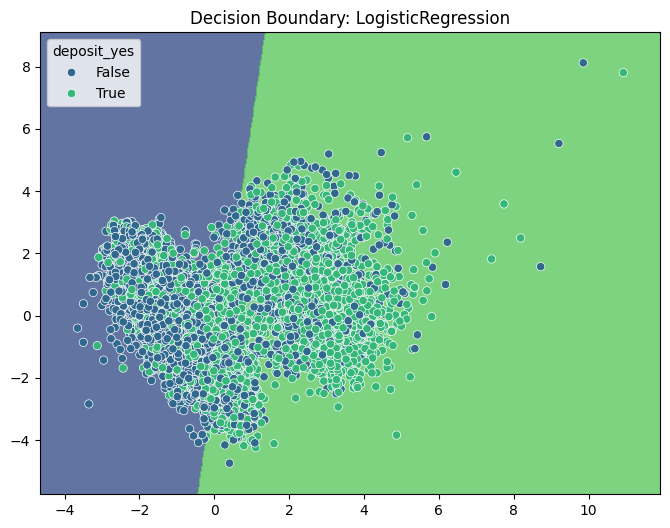

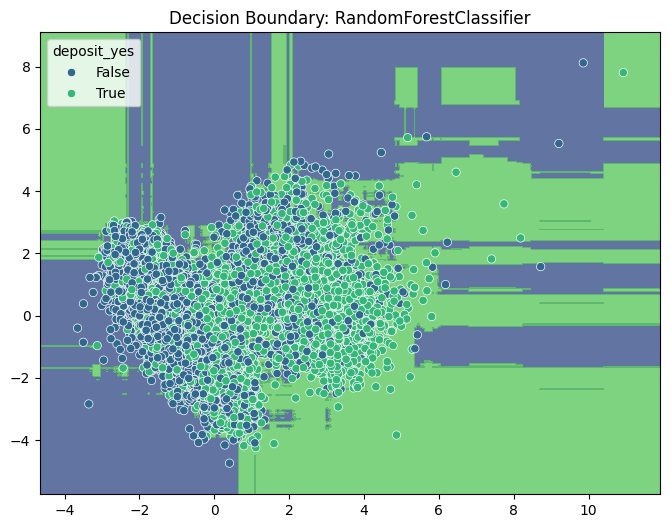

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, ax):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', ax=ax)
    ax.set_title(f"Decision Boundary: {model.__class__.__name__}")

# Plot for Logistic Regression (PCA)
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(X_train_pca, y_train, log_reg_pca, ax)
plt.show()

# Plot for Random Forest (PCA)
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(X_train_pca, y_train, rf_pca, ax)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# Compute metrics before and after dimensionality reduction
metrics_before = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [log_reg_pca_acc, rf_acc],
    'Training Time (s)': [log_reg_time, rf_time]
}

# Define PCA and t-SNE metrics for Logistic Regression and Random Forest
log_reg_pca_time = ...  # Time taken for Logistic Regression with PCA
rf_pca_time = ...  # Time taken for Random Forest with PCA
log_reg_tsne_time = ...  # Time taken for Logistic Regression with t-SNE
rf_tsne_time = ...  # Time taken for Random Forest with t-SNE

metrics_after = {
    'Model': ['Logistic Regression PCA', 'Random Forest PCA', 'Logistic Regression t-SNE', 'Random Forest t-SNE'],
    'Accuracy': [log_reg_pca_acc, rf_pca_acc, log_reg_tsne_acc, rf_tsne_acc],
    'Training Time (s)': [log_reg_pca_time, rf_pca_time, log_reg_tsne_time, rf_tsne_time]
}

metrics_before_df = pd.DataFrame(metrics_before)
metrics_after_df = pd.DataFrame(metrics_after)


<ipython-input-11-0db2af117235>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_before_df, palette='viridis', ax=axs[0])
<ipython-input-11-0db2af117235>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_after_df, palette='viridis', ax=axs[0])
<ipython-input-11-0db2af117235>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-11-0db2af117235>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

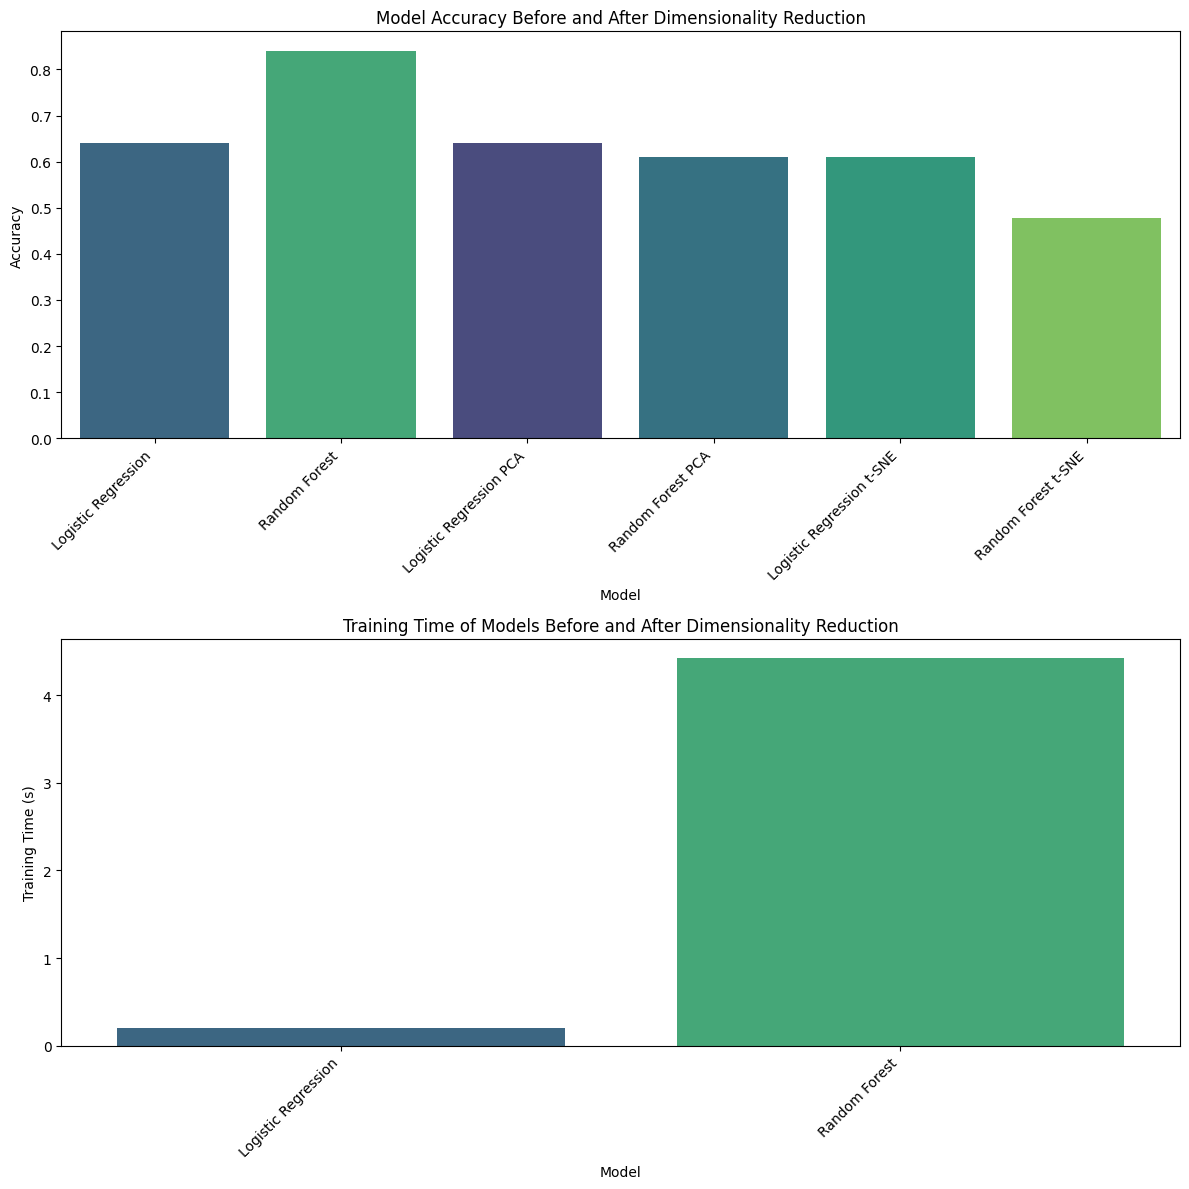

In [ ]:
# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot Accuracy
sns.barplot(x='Model', y='Accuracy', data=metrics_before_df, palette='viridis', ax=axs[0])
sns.barplot(x='Model', y='Accuracy', data=metrics_after_df, palette='viridis', ax=axs[0])
axs[0].set_title('Model Accuracy Before and After Dimensionality Reduction')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Plot Training Time
sns.barplot(x='Model', y='Training Time (s)', data=metrics_before_df, palette='viridis', ax=axs[1])
# sns.barplot(x='Model', y='Training Time (s)', data=metrics_after_df, palette='viridis', ax=axs[1])
axs[1].set_title('Training Time of Models Before and After Dimensionality Reduction')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()
